# Data Cleaning Pipeline

This notebook implements a data cleaning pipeline for seismic wave data that includes the following steps:

1. Remove unlabeled data files
2. Normalize signals using z-score normalization
3. Apply bandpass filtering to remove noise


In [168]:
import pandas as pd 
import os 
import shutil
import numpy as np
from obspy import read
import matplotlib.pyplot as plt
import scipy

### Remove unlabeled data

In [169]:
# Read the csv file with unlabeled data
df = pd.read_csv('/mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/unlabeled_data.csv')

# Path to dataset folder
dataset_path = '/mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/labeled_dataset'
normalized_dataset_path = '/mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_dataset'
filtered_dataset_path = '/mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_filtered_dataset'


In [170]:
def remove_unlabeled_data():
    """
    Remove unlabeled data from the dataset folder.
    """
    for file_id in df['File ID']:
        if len(str(file_id)) == 7:
            file_path = os.path.join(dataset_path, f'0{file_id}.mseed')
        else:
            file_path = os.path.join(dataset_path, f'{file_id}.mseed')

        # Check if the file exists
        if os.path.exists(file_path):
            # Remove the file
            os.remove(file_path)
            print(f'Removed {file_id}')
        else:
            print(f'File {file_id} does not exist')

In [171]:
remove_unlabeled_data()

# see the numbers of the files in the filtered dataset
files = os.listdir(dataset_path)
print(f'Total files in filtered dataset: {len(files)}')

Removed 1200456
Removed 1200517
Removed 1200531
Removed 1201217
Removed 1281939
Removed 2081807
Removed 3051301
Removed 3140259
Removed 3140600
Removed 3191957
Removed 3200328
Removed 3200329
Removed 4301418
Removed 5010731
Removed 5012153
Removed 6092231
Removed 10011118
Removed 10011256
Removed 10111517
Removed 10310713
Removed 11011019
Removed 12101447
Removed 12131733
Removed 12162359
Total files in filtered dataset: 2476


### Z-score normalization

In [172]:
def normalize_signal(tr):
    """Normalizes seismic signal using z-score.
    Args:
        tr: Trace with signal to normalize
    Returns:
        array: Normalized signal"""
    data_normalized = (tr.data - np.mean(tr.data)) / np.std(tr.data)
    return data_normalized


def normalize_dataset():
    """
    Normalize dataset using z-score normalization.
    """
    # Path normal dataset
    normal_dataset_path = dataset_path

    # Destination path
    destination_path = normalized_dataset_path
    if not os.path.exists(destination_path):
        os.makedirs(destination_path)
    # Iterate over all files in the dataset folder
    for filename in os.listdir(normal_dataset_path):
        if filename.endswith('.mseed'):
            # Read the seismic data
            file_path = os.path.join(normal_dataset_path, filename)
            st = read(file_path)

            # Normalize each trace
            for tr in st:
                tr.data = normalize_signal(tr)

            # Save the normalized data to the destination path
            output_file_path = os.path.join(destination_path, filename)
            st.write(output_file_path, format='MSEED')
            print(f'Normalized {filename} and saved to {output_file_path}')




In [173]:
# Normalize data set
normalize_dataset()
files = os.listdir(normalized_dataset_path)
print(f'Total files in filtered dataset: {len(files)}')

/home/llamqak/miniconda3/envs/wavePredict/lib/python3.12/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


Normalized 01010056.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_dataset/01010056.mseed
Normalized 01010332.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_dataset/01010332.mseed
Normalized 01010543.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_dataset/01010543.mseed
Normalized 01010544.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_dataset/01010544.mseed
Normalized 01010950.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_dataset/01010950.mseed
Normalized 01011302.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_dataset/01011302.mseed
Normalized 01011314.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/Seis

In [174]:
def plot_original_vs_normalized(filename):
    """
    Plots original and normalized signals side by side for comparison.
    Args:
        filename: Name of the MSEED file to analyze
    """
    # Read original signal
    original_path = os.path.join(dataset_path, filename)
    original_st = read(original_path)
    original_tr = original_st[0]
    
    # Read normalized signal
    normalized_path = os.path.join(normalized_dataset_path, 
                                 filename)
    normalized_st = read(normalized_path)
    normalized_tr = normalized_st[0]
    
    # Create time array
    npts = original_tr.stats.npts
    sampling_rate = original_tr.stats.sampling_rate
    times = np.arange(0, npts) / sampling_rate
    
    # Create subplot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
    
    # Plot original signal
    ax1.plot(times, original_tr.data, 'b-', label='Original')
    ax1.set_title('Original Seismic Signal')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Amplitude')
    ax1.grid(True)
    ax1.legend()
    
    # Plot normalized signal
    ax2.plot(times, normalized_tr.data, 'r-', label='Normalized')
    ax2.set_title('Normalized Seismic Signal')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Amplitude (normalized)')
    ax2.grid(True)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print("Original signal stats:")
    print(f"Mean: {np.mean(original_tr.data):.2f}")
    print(f"Std: {np.std(original_tr.data):.2f}")
    print("\nNormalized signal stats:")
    print(f"Mean: {np.mean(normalized_tr.data):.2f}")
    print(f"Std: {np.std(normalized_tr.data):.2f}")



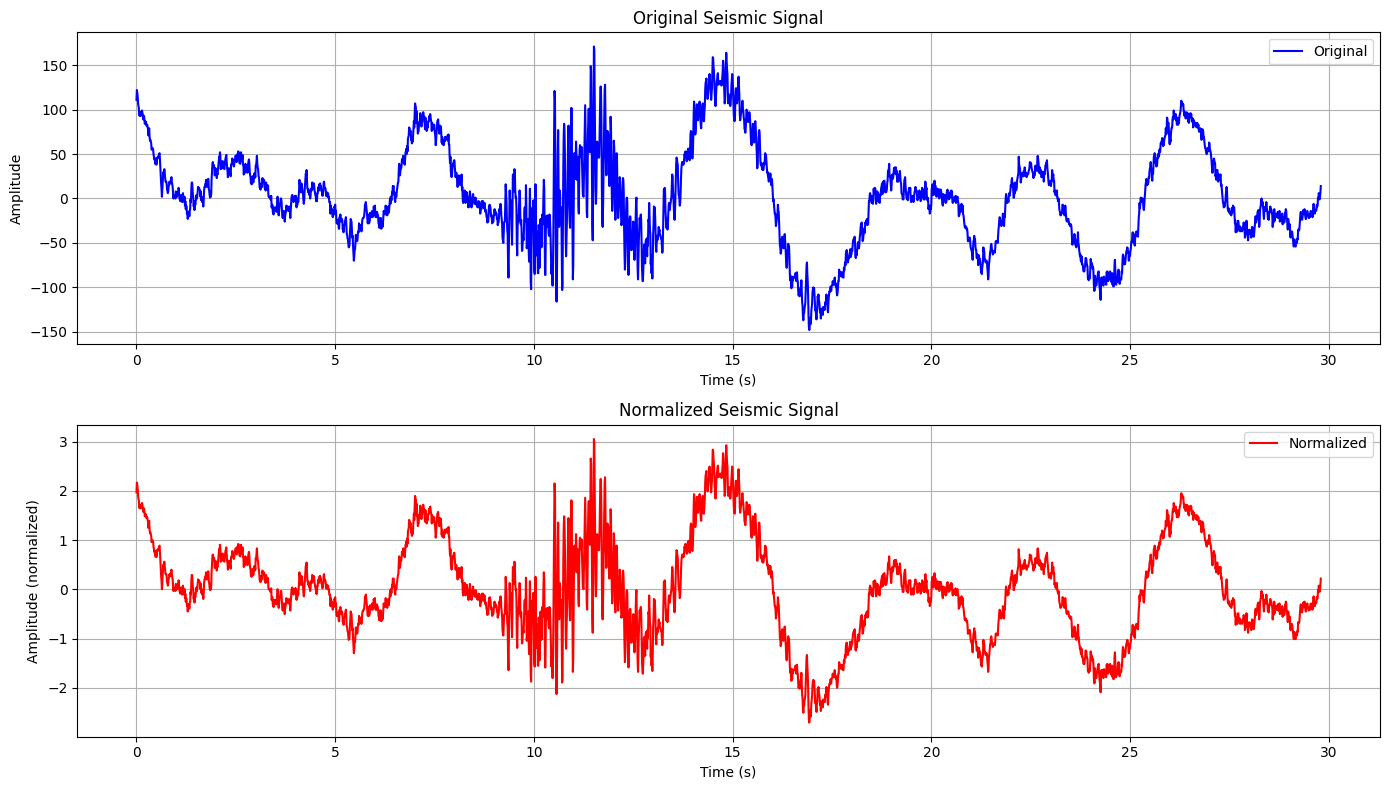

Original signal stats:
Mean: 1.96
Std: 55.41

Normalized signal stats:
Mean: -0.00
Std: 1.00


In [175]:
files = os.listdir(dataset_path)
mseed_file = '04010355.mseed'  
plot_original_vs_normalized(mseed_file)

### Bandpass filter

In [ ]:
# Remove noise from signals
def bandpass_filter(signal, fs, lowcut=7, highcut=19, order=4):
    """Applies Butterworth bandpass filter to the signal.
    Args:
        signal: Signal to filter
        fs: Sampling frequency
        lowcut: Lower cutoff frequency (Hz)
        highcut: Upper cutoff frequency (Hz)
        order: Filter order
    Returns:
        array: Filtered signal"""
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    y = scipy.signal.filtfilt(b, a, signal)
    return y

# Filter normalized dataset
def filter_normalized_dataset():
    """
    Filter normalized dataset using bandpass filter.
    """
    # Path to normalized dataset
    normalized_dataset = normalized_dataset_path

    # Destination path
    filtered_dataset = filtered_dataset_path
    if not os.path.exists(filtered_dataset_path):
        os.makedirs(filtered_dataset_path)

    # Iterate over all files in the normalized dataset folder
    for filename in os.listdir(normalized_dataset):
        if filename.endswith('.mseed'):
            # Read the seismic data
            file_path = os.path.join(normalized_dataset, filename)
            st = read(file_path)
            
            for tr in st:
                tr.data = bandpass_filter(tr.data, tr.stats.sampling_rate)

            # Save the filtered data to the destination path
            output_file_path = os.path.join(filtered_dataset, filename)
            st.write(output_file_path, format='MSEED')
            print(f'Filtered {filename} and saved to {output_file_path}')



In [177]:
# Filter normalized dataset
filter_normalized_dataset()
files = os.listdir(filtered_dataset_path)
print(f'Total files in filtered dataset: {len(files)}')


Filtered 01010056.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_filtered_dataset/01010056.mseed
Filtered 01010332.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_filtered_dataset/01010332.mseed
Filtered 01010543.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_filtered_dataset/01010543.mseed
Filtered 01010544.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_filtered_dataset/01010544.mseed
Filtered 01010950.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_filtered_dataset/01010950.mseed
Filtered 01011302.mseed and saved to /mnt/c/Users/Usuario/Documents/Studies/GicoProject/SeismicWaves/data/procesed/normalized_filtered_dataset/01011302.mseed
Filtered 01011314.mseed and saved to /mnt/c/Users/Us

In [178]:
# view one file filtered data
def view_filtered_data(file_name):
    """
    View filtered data from the normalized filtered dataset.
    Args:
        filename: Name of the MSEED file to analyze
    """
    # Path to filtered dataset
    filtered_dataset = filtered_dataset_path
    
    # Read the seismic data
    file_path = os.path.join(filtered_dataset, file_name)
    st = read(file_path)
    
    # Plot the first trace
    tr = st[0]
    plt.figure(figsize=(14, 4))
    plt.plot(tr.times(), tr.data, 'b-')
    plt.title(f'Filtered Seismic Signal - {file_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

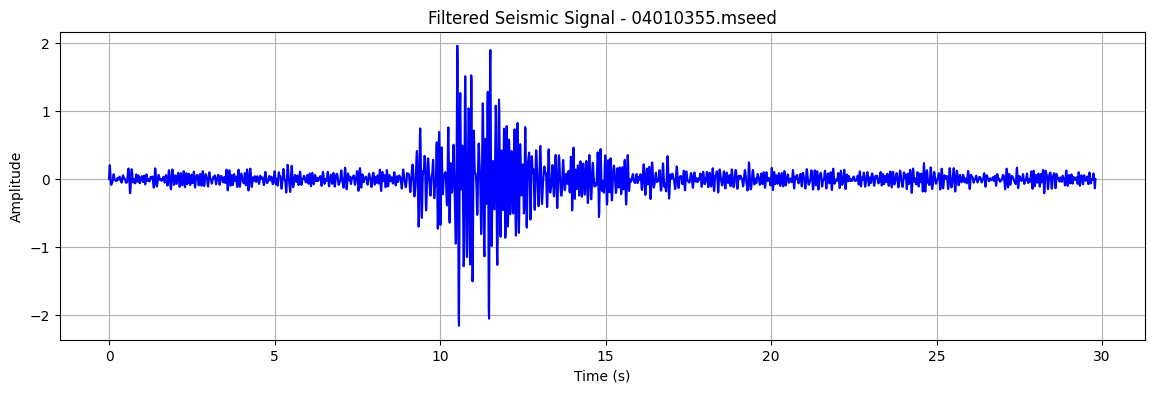

In [179]:
# plot filtered data
file_name = '04010355.mseed'
view_filtered_data(file_name)

In [181]:
# see the numbers of the files in the filtered dataset
filtered_dataset_path = filtered_dataset_path
files = os.listdir(filtered_dataset_path)
print(f'Total files in filtered dataset: {len(files)}')

Total files in filtered dataset: 2476


>Note: To check if the data is correcto i use the repo mentioned before in the first notebook